In [90]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:

df = pd.read_csv('placement.csv')

In [92]:
df.shape

(1000, 3)

In [93]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('placed',axis=1),df['placed'],test_size=0.2,random_state=42)

<Axes: xlabel='cgpa', ylabel='placement_exam_marks'>

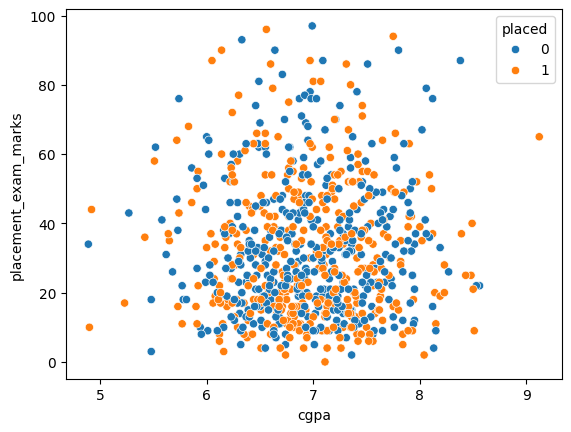

In [96]:
sns.scatterplot(x=xtrain['cgpa'],y=xtrain['placement_exam_marks'],hue=ytrain)

<Axes: xlabel='cgpa', ylabel='Density'>

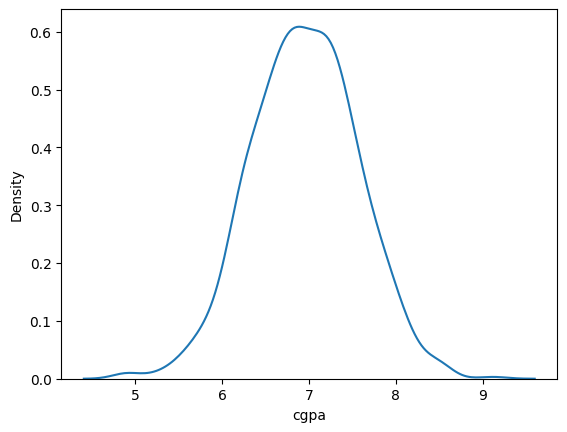

In [97]:
###first check for normal disturbution
sns.kdeplot(xtrain['cgpa'])

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

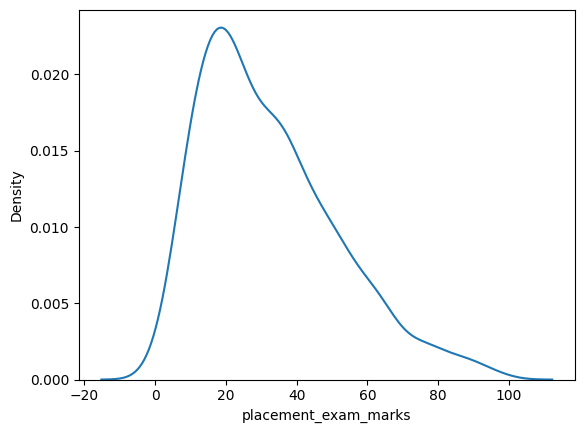

In [98]:
sns.kdeplot(xtrain['placement_exam_marks'])
###skewed we can not apply zscore outlire detection on this col

In [99]:
#### outlires det6ection

In [100]:
cgpa_mean=xtrain['cgpa'].mean()
cgpa_std=xtrain['cgpa'].std()

In [101]:
max=cgpa_mean+3*cgpa_std
min=cgpa_mean-3*cgpa_std


In [102]:
xtrain[(xtrain['cgpa']>max)|(xtrain['cgpa']<min)]

,cgpa,placement_exam_marks
485,4.92,44.0
997,4.89,34.0
999,4.90,10.0
996,9.12,65.0


## Treatment ##

**Trimming**

In [103]:
new_xtrain=xtrain[(xtrain['cgpa']<=max)&(xtrain['cgpa']>=min)]
new_xtrain.shape

(796, 2)

In [104]:
new_xtrain[(new_xtrain['cgpa']>max)|(new_xtrain['cgpa']<min)].shape

(0, 2)

## Using z-score +Triming ##

In [105]:

xtrain['cgpa_zscore']=(xtrain['cgpa']-cgpa_mean)/cgpa_std

In [106]:
xtrain.head()

,cgpa,placement_exam_marks,cgpa_zscore
29,6.51,15.0,-0.727334
535,6.49,62.0,-0.760146
695,6.75,11.0,-0.333593
557,6.47,25.0,-0.792957
836,7.09,33.0,0.224207


In [107]:
xtrain[(xtrain['cgpa_zscore']<-3)|(xtrain['cgpa_zscore']>3)]

,cgpa,placement_exam_marks,cgpa_zscore
485,4.92,44.0,-3.335867
997,4.89,34.0,-3.385085
999,4.90,10.0,-3.368679
996,9.12,65.0,3.554599


In [108]:
xtrain_zscore_triming=xtrain[(xtrain['cgpa_zscore']>=-3)&(xtrain['cgpa_zscore']<=3)]

In [110]:
xtrain_zscore_triming.shape

(796, 3)

## Capping ##

In [ ]:
xtrain.drop('cgpa_zscore',axis=1)


In [116]:
xtrain[(xtrain['cgpa']<min)|(xtrain['cgpa']>max)]

,cgpa,placement_exam_marks
485,4.92,44.0
997,4.89,34.0
999,4.90,10.0
996,9.12,65.0


In [117]:
xtrain['cgpa']=np.where((xtrain['cgpa']>=min)&(xtrain['cgpa']<=max), xtrain['cgpa'],np.where(xtrain['cgpa']<min,min,max))

In [120]:
xtrain[(xtrain['cgpa']<min)|(xtrain['cgpa']>max)].shape

(0, 2)